# Lab 3

## Part I: waves

Download the [wave buoy data for La Perouse Bank (off West Coast of VI)](http://www.ndbc.noaa.gov/station_realtime.php?station=46206). Use the _Real time standard meteorological data_ option. Before you start have a quick look at the _description_ - what kind of data is this? 

Download the data using a shell command. Read the data for the most recent 48 hours and store the first 10 columns into the variables `YY , MM, DD ,hh, mm, WDIR, WSPD, GST,  WVHT, DPD`.

In [60]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

Populating the interactive namespace from numpy and matplotlib


In [61]:
#!wget http://www.ndbc.noaa.gov/data/realtime2/46206.txt

In [62]:
file = open("46206.txt", "r")
d = []
for i in file:
    
    d.append(i)
file.close()

In [65]:
data2 = [] #list
#save the lines into the list, but separate the tokens so you can transpose later
for i in data:
    data2.append(i.split());

#cast list as numpy array, then transpose it, then cut the first 10 rows only, then save to data2.
data2 = np.array(data2).T[0:10]
print(data2) #just a check


[['#YY' '#yr' '2018' ..., '2018' '2018' '2018']
 ['MM' 'mo' '02' ..., '01' '01' '01']
 ['DD' 'dy' '28' ..., '14' '14' '14']
 ..., 
 ['GST' 'm/s' '16.0' ..., '13.0' '13.0' '12.0']
 ['WVHT' 'm' '4.1' ..., '3.0' '3.1' '2.7']
 ['DPD' 'sec' '7' ..., '12' '12' '13']]


In [103]:
YY = np.array(data2[0][2:])
MM = np.array(data2[1][2:]) 
DD = np.array(data2[2][2:])
hh = np.array(data2[3][2:])
mm = np.array(data2[4][2:]) 
WDIR = np.array(data2[5][2:])
WSPD = np.array(data2[6][2:]) 
GST = np.array(data2[7][2:])  
WVHT = np.array(data2[8][2:]) 
DPD = np.array(data2[9][2:])


Create a time variable that starts at `t=0 hrs` with the earliest time and goes forward in hours. Plot the wind speed as a function of this time variable.

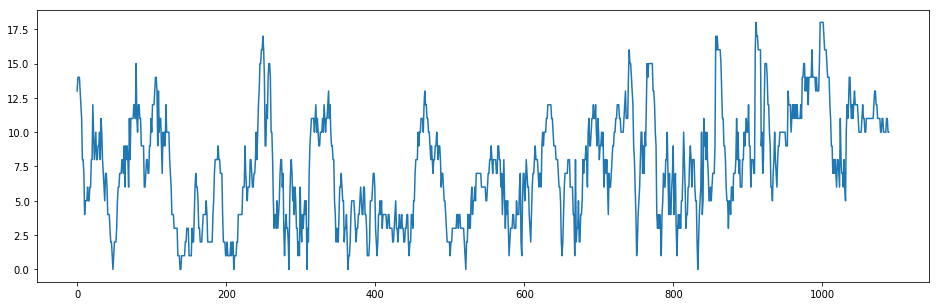

In [106]:
t = linspace(0, len(WSPD), len(WSPD))
plt.figure(figsize=(16,5))
plt.plot(t,WSPD)

Smooth the data by forming a centered moving average (CMA), where each value is replaced by the average of the value and the neighboring value on each side. Plot this smoothed data along with the original data. 

In [113]:
W = WSPD
for i in WSPD:
    W[i] = np.mean(WSPD[i-1], WSPD[i+1])

TypeError: tuple indices must be integers or slices, not numpy.str_

Create a spline fit, using sympy's splrep/splev function. Adjust the smoothing parameter so that the spline fit looks similar to the CMA line.

Make a plot of wave height agains wind speed using smoothed data.

## Part II: units
How much water do you have to store on your 10m high roof-top in order to store enough potential energy, that - if transformed without losses - could run a 50W bulp for 5 hr?

In [ ]:
import astropy.units as u
import astropy.constants as c

## Part III: integrate 
Using scipy's `integrate.cumtrapz` integrate one more time the area under a quadrant of a circle to determine $\pi$.
